## Analisis Regresi Ganda
Let's just copy some work.
And yeah, cool right?

Do remove the outputs if it bothers too much. Anw, what'll do:
- Prapemrosesan Data
    - Data Cleaning
    - NA Analysis
    - Outlier
    - Feature Selection
    - Dimensionality Red.
    - Oversampling/Undersampling
- EVD
- Pemodelan dan Optimasi
- Simpulan,Saran, dan Rekomendasi

### Open Library OFC.
and listing files

In [1]:
# Library
library(tidyverse)

# Files in folder nsc2022
list.files(path = "../input/nsc2022")
getwd()

list.files("")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


[1] "semifinal.xlsx"

[1] "/kaggle/working"

character(0)

### Read and Preprocessing Data 1
- read
- delete useless row
- rename name ofc
- change data type
- omit NA

In [2]:
df = readxl::read_xlsx(path = "../input/nsc2022/semifinal.xlsx")

# delete useless row
df = df[-1,]
t(head(df)) # or using glimpse, str
names(df)

# rename
nama.i = names(df) #saving old names
nama.0 = c("PPM","RL1", "PPK", "IPM", "UHH", 
                      "RL2", "San", "Air", "TPT", "TPK", "PDR")
nama.1 = c("Wilayah", paste(rep(nama.0, each=3), 19:21, sep=""))
nama.1

names(df) = nama.1

# data type using lapply
#df[, 1] = lapply(df[, 1], as.factor)
df[,-1] = lapply(df[,-1], as.numeric)

# get summary and NA's
str(df)
summary(df) #32 provinces and 2 real NA's for San:Last

New names:
• `` -> `...3`
• `` -> `...4`
• `` -> `...6`
• `` -> `...7`
• `` -> `...9`
• `` -> `...10`
• `` -> `...12`
• `` -> `...13`
• `` -> `...15`
• `` -> `...16`
• `` -> `...18`
• `` -> `...19`
• `` -> `...21`
• `` -> `...22`
• `` -> `...24`
• `` -> `...25`
• `` -> `...27`
• `` -> `...28`
• `` -> `...30`
• `` -> `...31`
• `` -> `...33`
• `` -> `...34`


Nama Wilayah,ACEH,Simeulue,Aceh Singkil,Aceh Selatan,Aceh Tenggara,Aceh Timur
Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),NA,18.99,20.78,13.09,13.43,14.47
...3,NA,18.49,20.2,12.87,13.21,14.08
...4,NA,18.98,20.36,13.18,13.41,14.45
Rata-rata Lama Sekolah Penduduk 15+ (Tahun),NA,9.08,8.52,8.59,9.65,7.86
...6,NA,9.34,8.53,8.87,9.66,8.15
...7,NA,9.48,8.68,8.88,9.67,8.21
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),NA,7210,8715,8187,8067,8600
...9,NA,7085,8707,8089,8020,8489
...10,NA,7148,8776,8180,8030,8577
Indeks Pembangunan Manusia,NA,65.70,68.91,66.90,69.36,67.39


[1] "Nama Wilayah"                                                        
 [2] "Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)"     
 [3] "...3"                                                                
 [4] "...4"                                                                
 [5] "Rata-rata Lama Sekolah Penduduk 15+ (Tahun)"                         
 [6] "...6"                                                                
 [7] "...7"                                                                
 [8] "Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)"        
 [9] "...9"                                                                
[10] "...10"                                                               
[11] "Indeks Pembangunan Manusia"                                          
[12] "...12"                                                               
[13] "...13"                                                               
[14] "Umur Harapan Hidup (Tahun)"                                          
[15] "...15"                                                               
[16] "...16"                                                               
[17] "Rata-Rata Lama Sekolah Penduduk Umur 15 Tahun ke Atas"               
[18] "...18"                                                               
[19] "...19"                                                               
[20] "Persentase rumah tangga yang memiliki akses terhadap sanitasi layak" 
[21] "...21"                                                               
[22] "...22"                                                               
[23] "Persentase rumah tangga yang memiliki akses terhadap air minum layak"
[24] "...24"                                                               
[25] "...25"                                                               
[26] "Tingkat Pengangguran Terbuka"                                        
[27] "...27"                                                               
[28] "...28"                                                               
[29] "Tingkat Partisipasi Angkatan Kerja"                                  
[30] "...30"                                                               
[31] "...31"                                                               
[32] "PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)"          
[33] "...33"                                                               
[34] "...34"

[1] "Wilayah" "PPM19"   "PPM20"   "PPM21"   "RL119"   "RL120"   "RL121"  
 [8] "PPK19"   "PPK20"   "PPK21"   "IPM19"   "IPM20"   "IPM21"   "UHH19"  
[15] "UHH20"   "UHH21"   "RL219"   "RL220"   "RL221"   "San19"   "San20"  
[22] "San21"   "Air19"   "Air20"   "Air21"   "TPT19"   "TPT20"   "TPT21"  
[29] "TPK19"   "TPK20"   "TPK21"   "PDR19"   "PDR20"   "PDR21"

tibble [548 × 34] (S3: tbl_df/tbl/data.frame)
 $ Wilayah: chr [1:548] "ACEH" "Simeulue" "Aceh Singkil" "Aceh Selatan" ...
 $ PPM19  : num [1:548] NA 19 20.8 13.1 13.4 ...
 $ PPM20  : num [1:548] NA 18.5 20.2 12.9 13.2 ...
 $ PPM21  : num [1:548] NA 19 20.4 13.2 13.4 ...
 $ RL119  : num [1:548] NA 9.08 8.52 8.59 9.65 ...
 $ RL120  : num [1:548] NA 9.34 8.53 8.87 9.66 ...
 $ RL121  : num [1:548] NA 9.48 8.68 8.88 9.67 ...
 $ PPK19  : num [1:548] NA 7210 8715 8187 8067 ...
 $ PPK20  : num [1:548] NA 7085 8707 8089 8020 ...
 $ PPK21  : num [1:548] NA 7148 8776 8180 8030 ...
 $ IPM19  : num [1:548] NA 65.7 68.9 66.9 69.4 ...
 $ IPM20  : num [1:548] NA 66 68.9 67.1 69.4 ...
 $ IPM21  : num [1:548] NA 66.4 69.2 67.4 69.4 ...
 $ UHH19  : num [1:548] NA 65.2 67.4 64.3 68 ...
 $ UHH20  : num [1:548] NA 65.3 67.4 64.3 68.1 ...
 $ UHH21  : num [1:548] NA 65.3 67.4 64.4 68.2 ...
 $ RL219  : num [1:548] NA 9.22 8.94 9.17 8.97 ...
 $ RL220  : num [1:548] NA 10.06 8.92 9.31 9.62 ...
 $ RL221  : num [1

   Wilayah              PPM19           PPM20            PPM21      
 Length:548         Min.   : 1.68   Min.   : 2.020   Min.   : 2.38  
 Class :character   1st Qu.: 6.66   1st Qu.: 6.787   1st Qu.: 7.15  
 Mode  :character   Median : 9.73   Median :10.120   Median :10.51  
                    Mean   :12.01   Mean   :11.993   Mean   :12.31  
                    3rd Qu.:14.85   3rd Qu.:14.605   3rd Qu.:14.94  
                    Max.   :43.65   Max.   :41.760   Max.   :41.66  
                    NA's   :32      NA's   :32       NA's   :32     
     RL119            RL120            RL121            PPK19      
 Min.   : 0.970   Min.   : 1.130   Min.   : 1.420   Min.   : 4181  
 1st Qu.: 7.270   1st Qu.: 7.428   1st Qu.: 7.508   1st Qu.: 8648  
 Median : 8.110   Median : 8.240   Median : 8.305   Median :10282  
 Mean   : 8.216   Mean   : 8.342   Mean   : 8.436   Mean   :10434  
 3rd Qu.: 9.115   3rd Qu.: 9.285   3rd Qu.: 9.340   3rd Qu.:11798  
 Max.   :12.640   Max.   :12.650   Max. 

In [3]:
### Provinsi
df1 = cbind(df[,1], df)

for (i in 2:nrow(df1)){
    df1[i,1] = ifelse(is.na(df1[i,3])==F,df1[i-1,1],df1[i,1])
}

df1[,1:2] = lapply(df1[,1:2], as.factor)

colnames(df1)[1:2]= c("Provinsi","Kabupaten")

df1 = df1[!is.na(df1$PPM19),]

head(df1) #dah bersih

write.csv(df1, "clean.csv")


,Provinsi,Kabupaten,PPM19,PPM20,PPM21,RL119,RL120,RL121,PPK19,PPK20,⋯,Air21,TPT19,TPT20,TPT21,TPK19,TPK20,TPK21,PDR19,PDR20,PDR21
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,ACEH,Simeulue,18.99,18.49,18.98,9.08,9.34,9.48,7210,7085,⋯,87.44882,5.824548,5.468784,5.714106,62.49769,70.36660,71.15319,1600521,1602411,1648096
3,ACEH,Aceh Singkil,20.78,20.20,20.36,8.52,8.53,8.68,8715,8707,⋯,78.57524,8.575345,8.243327,8.363735,59.08809,61.97063,62.85427,1731165,1713664,1780419
4,ACEH,Aceh Selatan,13.09,12.87,13.18,8.59,8.87,8.88,8187,8089,⋯,79.65393,6.540589,6.538698,6.457665,58.99897,61.41141,60.84817,4243396,4241408,4345784
5,ACEH,Aceh Tenggara,13.43,13.21,13.41,9.65,9.66,9.67,8067,8020,⋯,86.71043,3.454152,5.724810,6.429772,67.40960,71.33009,69.62269,3442064,3436344,3487157
6,ACEH,Aceh Timur,14.47,14.08,14.45,7.86,8.15,8.21,8600,8489,⋯,83.16171,7.612892,7.263998,7.133678,59.36934,61.92088,59.47917,8146982,8272641,8433526
7,ACEH,Aceh Tengah,15.50,15.08,15.26,9.69,9.85,9.86,10782,10673,⋯,90.09654,2.646803,3.051620,2.612948,72.50249,79.96011,76.29572,5836845,5767948,5953118


## Oke, ini bersih

In [4]:
# data kotor, nama
names(readxl::read_xlsx("../input/nsc2022/semifinal.xlsx"))

# data bersih, tersimpan
df1 = read.csv("clean.csv")[,-1]
df1[,1:2] = lapply(df1[, 1:2], as.factor)
head(df1)


New names:
• `` -> `...3`
• `` -> `...4`
• `` -> `...6`
• `` -> `...7`
• `` -> `...9`
• `` -> `...10`
• `` -> `...12`
• `` -> `...13`
• `` -> `...15`
• `` -> `...16`
• `` -> `...18`
• `` -> `...19`
• `` -> `...21`
• `` -> `...22`
• `` -> `...24`
• `` -> `...25`
• `` -> `...27`
• `` -> `...28`
• `` -> `...30`
• `` -> `...31`
• `` -> `...33`
• `` -> `...34`


[1] "Nama Wilayah"                                                        
 [2] "Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)"     
 [3] "...3"                                                                
 [4] "...4"                                                                
 [5] "Rata-rata Lama Sekolah Penduduk 15+ (Tahun)"                         
 [6] "...6"                                                                
 [7] "...7"                                                                
 [8] "Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)"        
 [9] "...9"                                                                
[10] "...10"                                                               
[11] "Indeks Pembangunan Manusia"                                          
[12] "...12"                                                               
[13] "...13"                                                               
[14] "Umur Harapan Hidup (Tahun)"                                          
[15] "...15"                                                               
[16] "...16"                                                               
[17] "Rata-Rata Lama Sekolah Penduduk Umur 15 Tahun ke Atas"               
[18] "...18"                                                               
[19] "...19"                                                               
[20] "Persentase rumah tangga yang memiliki akses terhadap sanitasi layak" 
[21] "...21"                                                               
[22] "...22"                                                               
[23] "Persentase rumah tangga yang memiliki akses terhadap air minum layak"
[24] "...24"                                                               
[25] "...25"                                                               
[26] "Tingkat Pengangguran Terbuka"                                        
[27] "...27"                                                               
[28] "...28"                                                               
[29] "Tingkat Partisipasi Angkatan Kerja"                                  
[30] "...30"                                                               
[31] "...31"                                                               
[32] "PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)"          
[33] "...33"                                                               
[34] "...34"

,Provinsi,Kabupaten,PPM19,PPM20,PPM21,RL119,RL120,RL121,PPK19,PPK20,⋯,Air21,TPT19,TPT20,TPT21,TPK19,TPK20,TPK21,PDR19,PDR20,PDR21
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ACEH,Simeulue,18.99,18.49,18.98,9.08,9.34,9.48,7210,7085,⋯,87.44882,5.824548,5.468784,5.714106,62.49769,70.36660,71.15319,1600521,1602411,1648096
2,ACEH,Aceh Singkil,20.78,20.20,20.36,8.52,8.53,8.68,8715,8707,⋯,78.57524,8.575345,8.243327,8.363735,59.08809,61.97063,62.85427,1731165,1713664,1780419
3,ACEH,Aceh Selatan,13.09,12.87,13.18,8.59,8.87,8.88,8187,8089,⋯,79.65393,6.540589,6.538698,6.457665,58.99897,61.41141,60.84817,4243396,4241408,4345784
4,ACEH,Aceh Tenggara,13.43,13.21,13.41,9.65,9.66,9.67,8067,8020,⋯,86.71043,3.454152,5.724810,6.429772,67.40960,71.33009,69.62269,3442064,3436344,3487157
5,ACEH,Aceh Timur,14.47,14.08,14.45,7.86,8.15,8.21,8600,8489,⋯,83.16171,7.612892,7.263998,7.133678,59.36934,61.92088,59.47917,8146982,8272641,8433526
6,ACEH,Aceh Tengah,15.50,15.08,15.26,9.69,9.85,9.86,10782,10673,⋯,90.09654,2.646803,3.051620,2.612948,72.50249,79.96011,76.29572,5836845,5767948,5953118


png 
  2

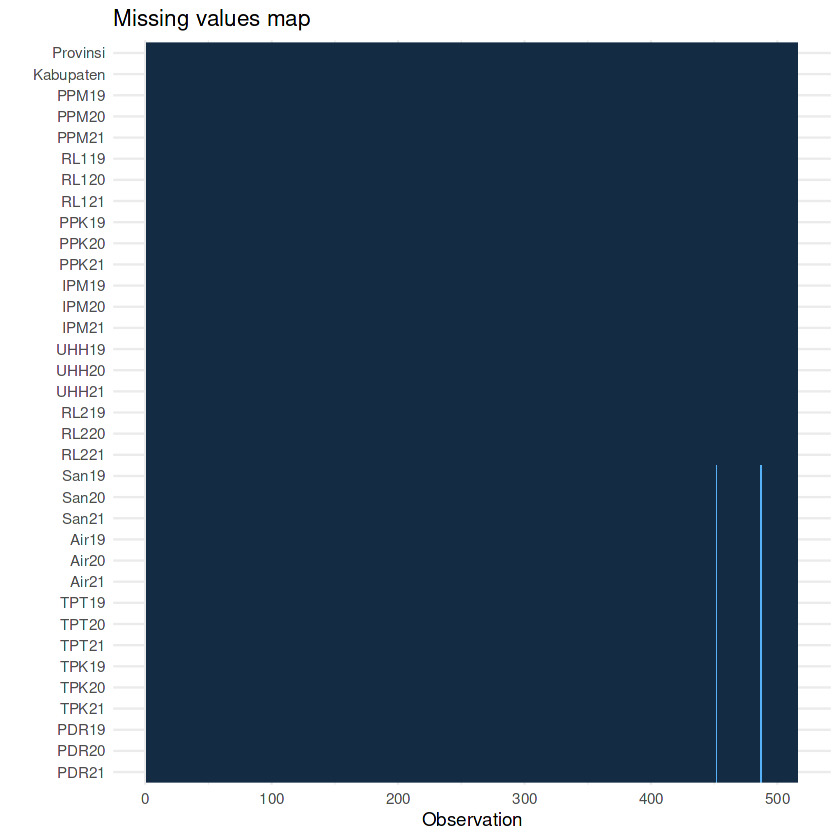

In [5]:
# NA plot and filling (impute, MICE)
finalfit::missing_plot(df1)

dev.print(device=jpeg,
          filename="misplot.jpeg",
          width=800,
          height=800
)


### Preprocessing Data 2
Oke?
- NA filling
- 

### EDA
Isinya ya eksplorasi data, just what ur expectations?